# Using Machine Learning to Improve Heart Attack Survivability in Hospitals

#### Final Project for Introduction to Machine Learning: Supervised Learning

## Table of Contents

- [1 Background](#Background)
  * [1.1 Purpose](#Purpose)
  * [1.2 Data](#Data)
  * [1.3 Import Libraries](#Import-Libraries)
- [2 Data Info & Cleansing](#Data-Info-&-Cleansing)
  * [2.1 Data Shape & Types](#Data-Shape-&-Types)
  * [2.2 Check Data](#Check-Data)
- [3 Data Exploration](#Data-Exploration)
  * [3.1 Correlation](#Correlation)
- [4 Model Building](#Model-Building) 
  * [4.1 Training/Testing Split](#Training/Testing-Split)
  * [4.2 Linear Logistic Regression](#Linear-Logistic-Regression)
  * [4.2 Support Vector Machines](#Support-Vector-Machines)
  * [4.2 Random Forest](#Random-Forest)
  * [4.2 Decision Tree](#Decision-Tree)
- [5 Conclusion](#Conclusion)

## Background

### Purpose
Cardiovascular disease, including heart disease, remains a significant global health challenge, claiming millions of lives each year and placing a substantial burden on healthcare systems worldwide. In response to this pressing issue, I have chosen to do my project dedicated to advancing our understanding and management of heart disease. I believe that machine learning holds the potential to enhance the way we approach cardiovascular health, from early risk prediction to personalized treatment strategies. My project aims to improve the accuracy of heart disease diagnosis, enhance risk assessment, and, ultimately, contribute to better healthcare outcomes by enabling timely interventions and more effective healthcare delivery.

To this end, I will be using the supervised machine learning techniques learned throughout this course to create a model that will predict the survival and mortality of heart patients.  The goal of creating this model is to reduce the incidence of heart disease and alleviate the socioeconomic burden it places on individuals, families, and healthcare systems, thus contributing to improved public health and well-being.

### Data

https://doi.org/10.1371/journal.pone.0181001

https://plos.figshare.com/articles/dataset/Survival_analysis_of_heart_failure_patients_A_case_study/5227684/1

The data I will be using originally sourced from the Faisalabad Institute of Cardiology and the Allied Hospital of Faisalabad in Punjab, Pakistan and then collected by.  In total, it contains 12 features of 299 patients (105 women and 194 men), including whether they had a death event.  All of the patients were in class III or IV stage of heart failure, had left ventricular systolic dysfunction, and had previous heart failures. Unfortunately, the data is unclear on some features such as the definition of 'high blood pressure'.

![image info](data/heart_failure_table_columns.jpg)

### Import Libraries

In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Info & Cleansing

This is where I will examine the data and perform any cleansing that needs to be done in order to have the data usable for the models.  I will examine the shape of the data, the datatype of each column, and examine the first 5 rows of the data to get an idea of what the data looks like.

I will then examine the data to see if there are any duplicates, any nulls, as well as make any changes to the column type or names that will make it easier to be understood.

### Data Shape & Types

In [2]:
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [3]:
df.shape

(299, 13)

In [4]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Check Data

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
sum(df.duplicated())

0

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Exploration

Here I will start to explore the data, seeing what correlations there are, what the different columns indicate regarding the data, and prepare the data for training and testing.

### Correlation

In [10]:
correlationdf = df.corr()
correlationdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

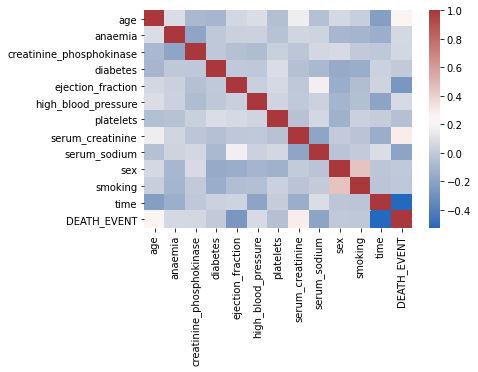

In [11]:
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(correlationdf, cmap="vlag")

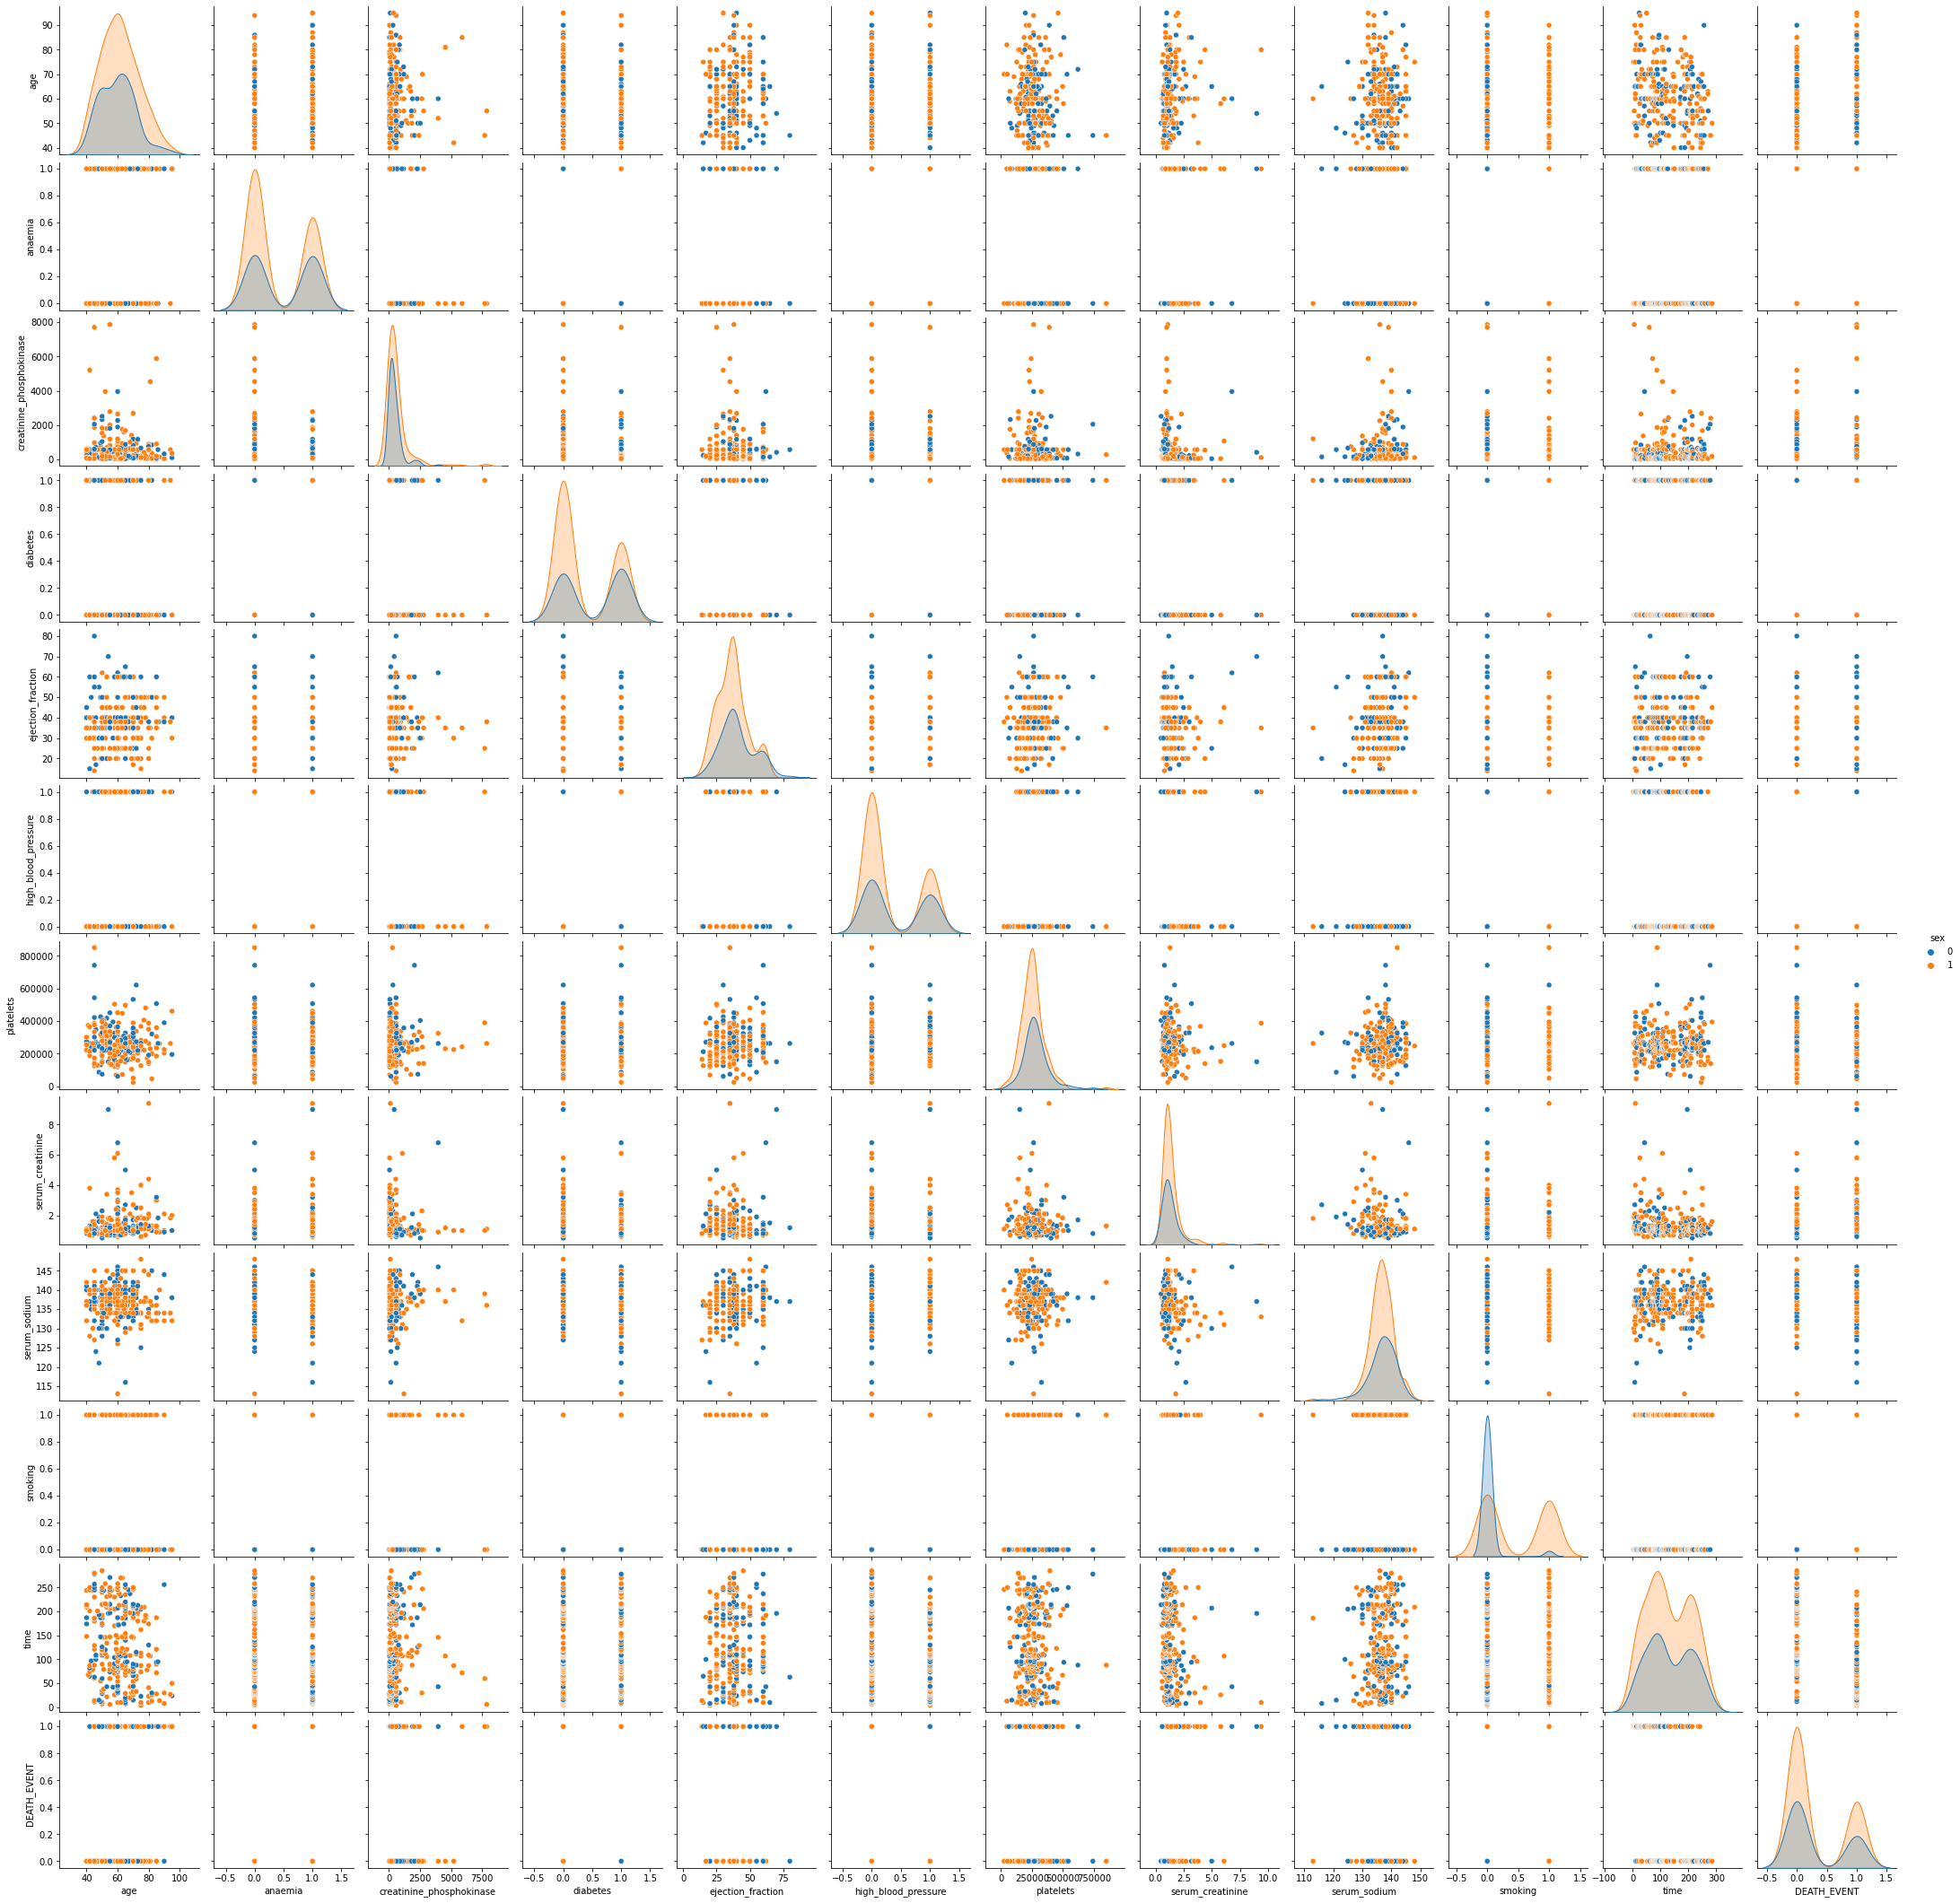

In [12]:
sns.pairplot(df, hue = 'sex')

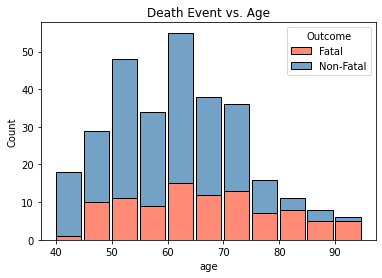

In [35]:
lived = df[df['DEATH_EVENT'] == 0]['age']
died = df[df['DEATH_EVENT'] == 1]['age']
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='stack', shrink=.9, bins = 11, palette=['steelblue', 'tomato'])
plt.title('Death Event vs. Age')
plt.legend(title='Outcome', labels=['Fatal', 'Non-Fatal'])


It is clear from this visualization that Age has a direct impact on the surviability of patients.  The older a patient is, the worse the outcome probability is.

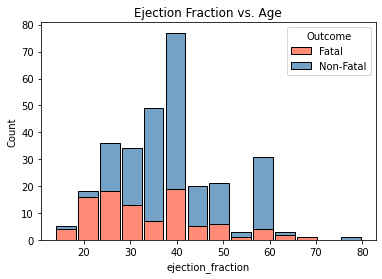

In [14]:
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', multiple='stack', shrink=.9, bins = 14, palette=['steelblue', 'tomato'])
plt.title('Ejection Fraction vs. Age')
plt.legend(title='Outcome', labels=['Fatal', 'Non-Fatal'])

It is clear from this visualization that Ejection Fraction has a direct impact on the surviability of patients.  The lower the ejection factor is, the worse the outcome probability is.

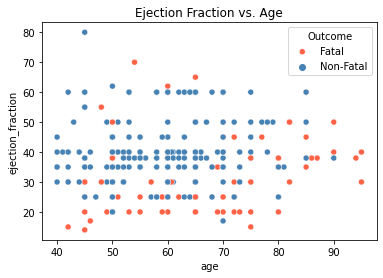

In [15]:
sns.scatterplot(data=df, x='age', y='ejection_fraction', hue='DEATH_EVENT', palette=['steelblue', 'tomato'])
plt.title('Ejection Fraction vs. Age')
plt.legend(title='Outcome', labels=['Fatal', 'Non-Fatal'])

In [16]:
death_correlation = correlationdf.loc[:,"DEATH_EVENT"]

values_of_highest_correlation = []

for x in range(len(death_correlation)):
    values_of_highest_correlation.append((abs(death_correlation[x]), x))
print(values_of_highest_correlation)

sorted_correlation = sorted(values_of_highest_correlation)
print(sorted_correlation[-6:])

print('Top 5 features are: ', df.columns[11], ',', df.columns[7],',', df.columns[4], ',', df.columns[0],', and', df.columns[8])
new_df = df[['time' , 'serum_creatinine' , 'ejection_fraction' , 'age' , 'serum_sodium', 'DEATH_EVENT']]

[(0.25372854308800347, 0), (0.06627009846028795, 1), (0.06272816025237475, 2), (0.0019428833442033991, 3), (0.26860331239406127, 4), (0.0793510576912853, 5), (0.04913886798037408, 6), (0.29427756098414914, 7), (0.19520359641640217, 8), (0.004316376319703093, 9), (0.012623152709359344, 10), (0.5269637792775774, 11), (1.0, 12)]
[(0.19520359641640217, 8), (0.25372854308800347, 0), (0.26860331239406127, 4), (0.29427756098414914, 7), (0.5269637792775774, 11), (1.0, 12)]
Top 5 features are:  time , serum_creatinine , ejection_fraction , age , and serum_sodium


From this we can see that the 5 features most correlated with a death event are time, serum creatine, ejection fraction, age, and serum sodium.

## Model Building

This is where I am going to be building out the framework for the model, training it, and testing it to see how effective it is.

### Training/Testing Split

In [17]:
X_data = new_df.iloc[:,:-1]
Y_data = new_df.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = .2, random_state=50085)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(239, 5)
(60, 5)
(239,)
(60,)


### Linear Logistic Regression

In [18]:
linear_model = LogisticRegression()
linear_model.fit(X_train, Y_train)

LogisticRegression()

In [19]:
Y_pred=linear_model.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[39  4]
 [ 5 12]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.75      0.71      0.73        17

    accuracy                           0.85        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.85      0.85      0.85        60



### Support Vector Machines

In [20]:
rbf_classifier_model = SVC(kernel='rbf')
rbf_classifier_model.fit(X_train, Y_train)
Y_pred_rbf = rbf_classifier_model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred_rbf))
print(classification_report(Y_test, Y_pred_rbf))

[[43  0]
 [ 6 11]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.65      0.79        17

    accuracy                           0.90        60
   macro avg       0.94      0.82      0.86        60
weighted avg       0.91      0.90      0.89        60



In [21]:
linear_classifier_model = SVC(kernel='linear')
linear_classifier_model.fit(X_train, Y_train)
Y_pred_linear = linear_classifier_model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred_linear))
print(classification_report(Y_test, Y_pred_linear))

[[39  4]
 [ 5 12]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.75      0.71      0.73        17

    accuracy                           0.85        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.85      0.85      0.85        60



In [22]:
poly_classifier_model = SVC(kernel='poly')
poly_classifier_model.fit(X_train, Y_train)
Y_pred_poly = poly_classifier_model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred_poly))
print(classification_report(Y_test, Y_pred_poly))

[[43  0]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.76      0.87        17

    accuracy                           0.93        60
   macro avg       0.96      0.88      0.91        60
weighted avg       0.94      0.93      0.93        60



### Random Forest

In [23]:
random_forest_model = RandomForestClassifier()

forest_params = {'max_depth':[3,5,None],
             'max_features': [1],
             'max_samples': [.7,1],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [10,100,300,500]
            }
scoring = {'accuracy','precision','recall','f1'}

forest_model_grid_search = GridSearchCV(random_forest_model, forest_params, scoring=scoring, cv=4, refit='accuracy')

In [24]:
%%time
forest_model_grid_search.fit(X_train, Y_train)

Wall time: 2min 48s


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1],
                         'max_samples': [0.7, 1], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 300, 500]},
             refit='accuracy',
             scoring={'precision', 'recall', 'accuracy', 'f1'})

In [25]:
print(forest_model_grid_search.best_params_)
print(forest_model_grid_search.best_score_)

{'max_depth': None, 'max_features': 1, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.8410310734463277


In [26]:
Y_pred_forest = forest_model_grid_search.predict(X_test)

print(confusion_matrix(Y_test, Y_pred_forest))
print(classification_report(Y_test, Y_pred_forest))

[[42  1]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.87        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



### Decision Tree

In [27]:
model_decision_tree_adjusted = DecisionTreeClassifier()

diff_parameters = {'max_depth': [2,3,4,5,6,7,8,None],
                   'min_samples_leaf': [1,2,3,4,5],
                   'min_samples_split': [2,3,4,5,6]
                  }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

adj_tree = GridSearchCV(model_decision_tree_adjusted, diff_parameters, scoring=scoring, cv=4, refit='accuracy')

adj_tree.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             refit='accuracy',
             scoring={'precision', 'recall', 'accuracy', 'f1'})

In [28]:
print(adj_tree.best_params_)
print(adj_tree.best_score_)

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.7907485875706216


In [29]:
model_decision_tree = DecisionTreeClassifier()

model_decision_tree.fit(X_train, Y_train)

Y_pred_tree = model_decision_tree.predict(X_test)

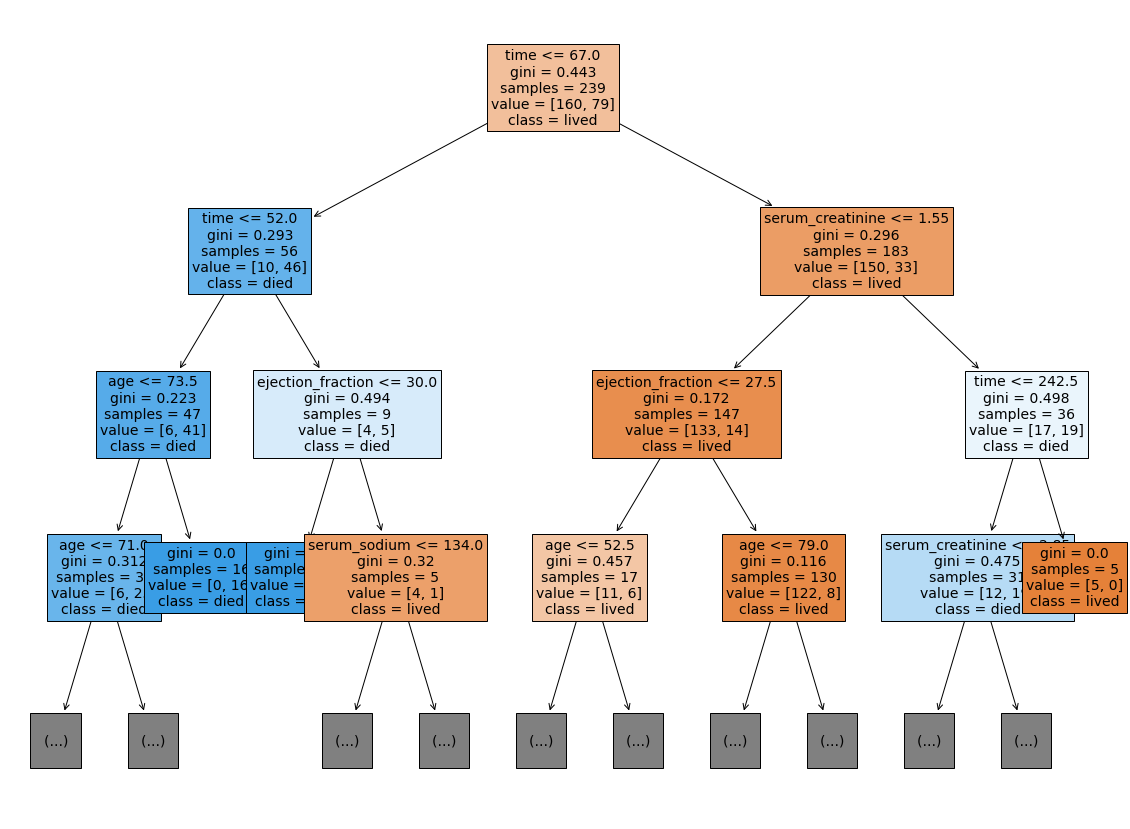

In [30]:
plt.figure(figsize=(20,15))
plot_tree(model_decision_tree, max_depth=3, fontsize=14, feature_names = new_df.columns, class_names= {0:'lived',1:'died'}, filled=True)
plt.show()

In [36]:
print(confusion_matrix(Y_test, Y_pred_tree))
print(classification_report(Y_test, Y_pred_tree))

[[38  5]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.72      0.76      0.74        17

    accuracy                           0.85        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



## Conclusion

The best model that was created was the Support Vector Machine with the polynomial kernel.  It had the following statistics and the highest f1-score of 0.96 and 0.87 for the 0 and 1 survivability outcome:

                precision    recall  f1-score   support
           0         0.91      1.00      0.96        43
           1         1.00      0.76      0.87        17
           
This is also very close to the statistics of the Random Forest model, which had the following statistics:

                precision    recall  f1-score   support
           0         0.93      0.98      0.95        43
           1         0.93      0.82      0.87        17

Overall, these models did a pretty accurate job of using these parameters/features to accurately predict whether a patient would have a positive outcome in the hospital or not.  While this procedure is not the most sophisticated or in-depth, it is a good proof of concept for the impact that machine learning could have on patient care.  By leveraging advanced data analytics and predictive modeling, we can enhance early diagnostic warning signs, improve treatment strategies, and ultimately improve the survivability of heart attack patients.  I would love to see these indicators being used to drive treatment and patient care.  I would also suggest increasing the sample size of data to see if these trends continue to hold up under further information.
